# WELCOME!

Welcome to "***Employee Churn Analysis Project***". 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.




## 1. Exploratory Data Analysis



### Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [ ]:
df=pd.read_csv('/content/HR_Dataset.csv')

In [ ]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
9894,0.570,0.480,5,221,3,0,0,0,support,medium
7313,0.310,0.420,2,169,5,0,0,0,IT,low
12115,0.370,0.480,2,137,3,0,1,0,technical,medium
4355,0.760,0.990,3,164,2,0,0,0,support,medium
7188,0.920,0.780,4,212,2,0,0,0,sales,medium
1126,0.880,0.870,4,235,6,0,1,0,management,low
9742,0.630,0.870,4,145,3,1,0,0,support,high
11875,0.420,0.470,6,174,5,0,0,0,technical,low
1563,0.430,0.520,2,146,3,0,1,0,technical,low
6841,0.900,0.480,3,213,3,0,0,0,support,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.000,0.613,0.249,0.090,0.440,0.640,0.820,1.000
last_evaluation,14999.000,0.716,0.171,0.360,0.560,0.720,0.870,1.000
number_project,14999.000,3.803,1.233,2.000,3.000,4.000,5.000,7.000
average_montly_hours,14999.000,201.050,49.943,96.000,156.000,200.000,245.000,310.000
time_spend_company,14999.000,3.498,1.460,2.000,3.000,3.000,4.000,10.000
Work_accident,14999.000,0.145,0.352,0.000,0.000,0.000,0.000,1.000
left,14999.000,0.238,0.426,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,14999.000,0.021,0.144,0.000,0.000,0.000,0.000,1.000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

3008

In [ ]:
df.drop_duplicates(inplace=True)

### Data Insights



In [ ]:
df_stay=df.loc[df['left']==0].describe().T

In [ ]:
df_left=df.loc[df['left']==1].describe().T

In [ ]:
pd.concat([df_stay,df_left],axis=0,keys=['stay','left'])

count    mean    std     min     25%     50%  \
stay satisfaction_level    10000.000   0.667  0.217   0.120   0.540   0.690   
     last_evaluation       10000.000   0.716  0.162   0.360   0.580   0.710   
     number_project        10000.000   3.787  0.982   2.000   3.000   4.000   
     average_montly_hours  10000.000 198.943 45.666  96.000 162.000 198.000   
     time_spend_company    10000.000   3.262  1.367   2.000   2.000   3.000   
     Work_accident         10000.000   0.174  0.380   0.000   0.000   0.000   
     left                  10000.000   0.000  0.000   0.000   0.000   0.000   
     promotion_last_5years 10000.000   0.019  0.138   0.000   0.000   0.000   
left satisfaction_level     1991.000   0.440  0.265   0.090   0.110   0.410   
     last_evaluation        1991.000   0.722  0.197   0.450   0.520   0.790   
     number_project         1991.000   3.883  1.817   2.000   2.000   4.000   
     average_montly_hours   1991.000 208.162 61.295 126.000 146.000 226.000   
     time_spend_company     1991.000   3.881  0.974   2.000   3.000   4.000   
     Work_accident          1991.000   0.053  0.224   0.000   0.000   0.000   
     left                   1991.000   1.000  0.000   1.000   1.000   1.000   
     promotion_last_5years  1991.000   0.004  0.063   0.000   0.000   0.000   

                               75%     max  
stay satisfaction_level      0.840   1.000  
     last_evaluation         0.850   1.000  
     number_project          4.000   6.000  
     average_montly_hours  238.000 287.000  
     time_spend_company      4.000  10.000  
     Work_accident           0.000   1.000  
     left                    0.000   0.000  
     promotion_last_5years   0.000   1.000  
left satisfaction_level      0.730   0.920  
     last_evaluation         0.910   1.000  
     number_project          6.000   7.000  
     average_montly_hours  262.500 310.000  
     time_spend_company      5.000   6.000  
     Work_accident           0.000   1.000  
     left                    1.000   1.000  
     promotion_last_5years   0.000   1.000

In [ ]:
df.groupby(["left","Departments "])["promotion_last_5years"].value_counts()

left  Departments   promotion_last_5years
0     IT            0                         818
      RandD         0                         588
                    1                          21
      accounting    0                         502
                    1                          10
      hr            0                         477
                    1                          11
      management    0                         349
                    1                          35
      marketing     0                         534
                    1                          27
      product_mng   0                         576
      sales         0                        2634
                    1                          55
      support       0                        1494
                    1                          15
      technical     0                        1833
                    1                          21
1     IT            0                         156
        

## 2. Data Visualization



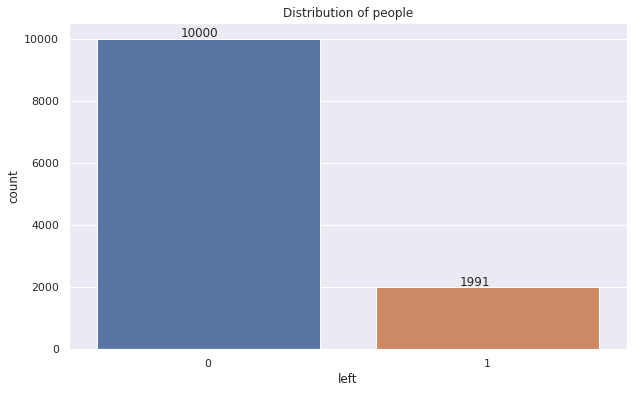

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df['left'])
plt.title('Distribution of people')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

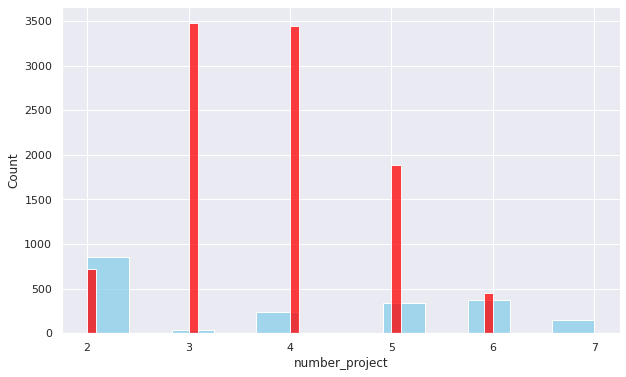

In [ ]:
sns.set(style="darkgrid")
sns.histplot(df.loc[df['left']==1]['number_project'],color='skyblue')
sns.histplot(df.loc[df['left']==0]['number_project'],color='red')

#from this data, we can obviously see that people left the company either work too many or too few projects.

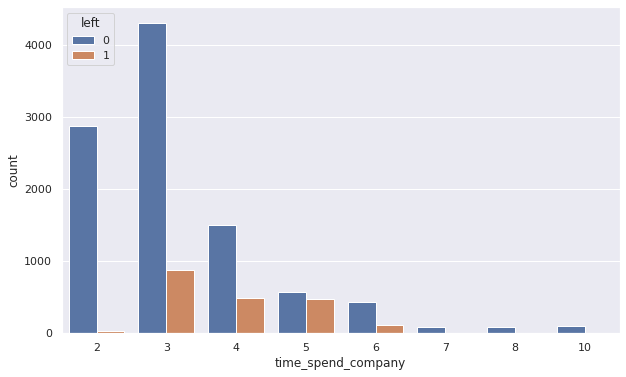

In [ ]:
sns.countplot(df['time_spend_company'],hue=df['left'])

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [ ]:
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

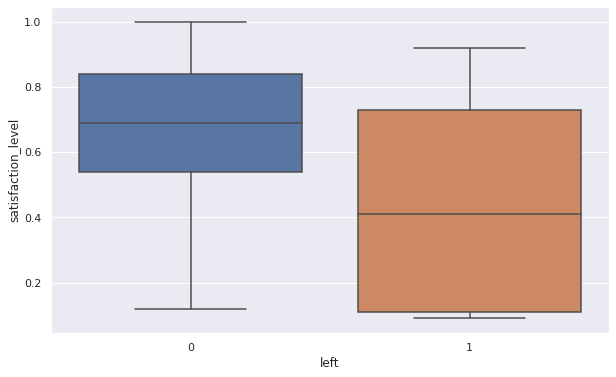

In [ ]:
sns.boxplot(x=df['left'],y=df['satisfaction_level']);
#it is an obvious satisfaction difference between people who left and stay

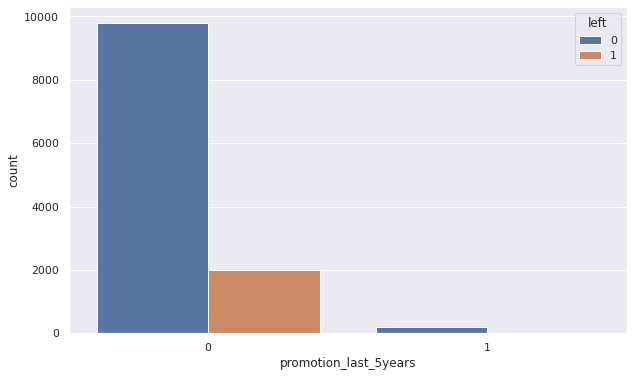

In [ ]:
sns.countplot(df['promotion_last_5years'],hue=df['left']);
#None of the people who left has had any promotion in the last 5 years

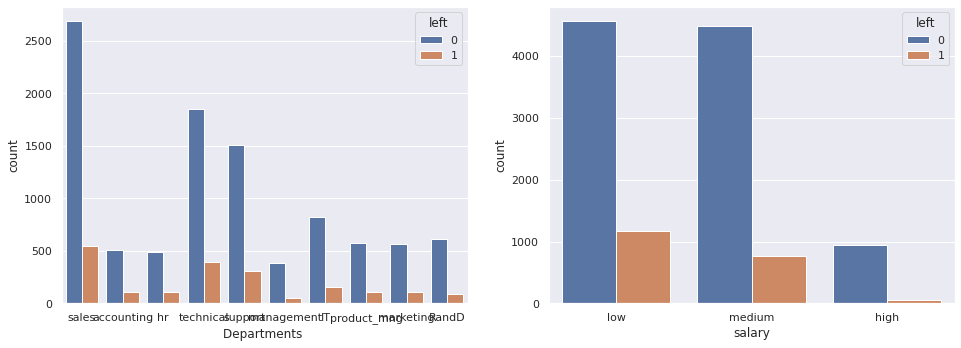

In [ ]:
cat_list = ["Departments ", "salary"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="left")

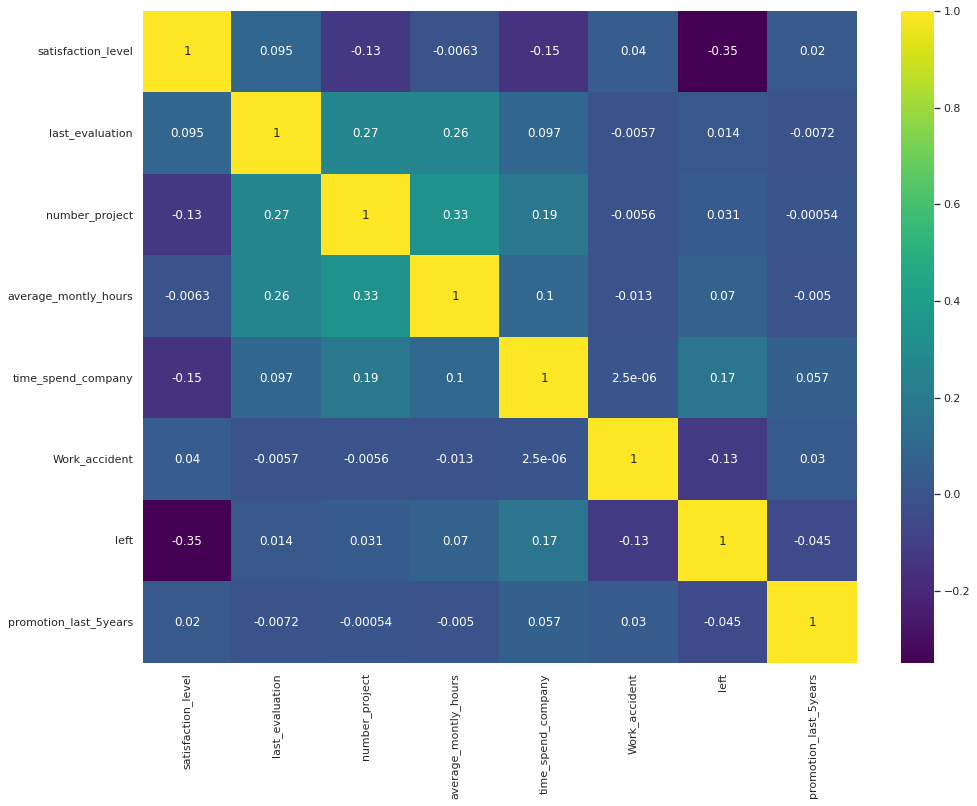

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

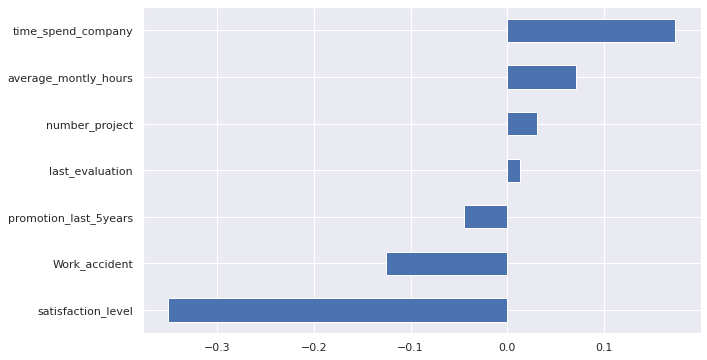

In [ ]:
df.corr()['left'].drop("left").sort_values().plot.barh();

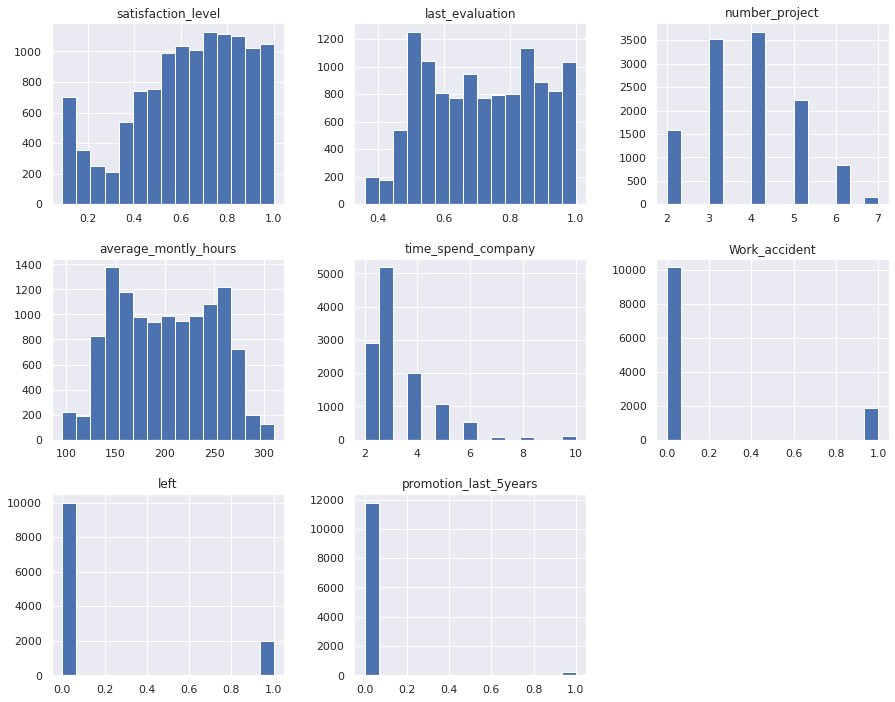

In [ ]:
df.hist(figsize=(15, 12), bins=15);

## 3. Data Pre-Processing

#### Scaling


    

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Most of the data is already between 0 and 1, because of that we will use a min-max scaler.


#### Encoding



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [ ]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [ ]:
df['salary']=df['salary'].map({'low':0,'medium':1,'high':2})

In [ ]:
df=df.drop(columns=['Departments '])
#We dropped the 'departments' column because this column has no effect on whether people stay or left

## 5. Model Building

### Split Data as Train and Test Set

In [ ]:
X=df.drop(["left"], axis=1)
y=df["left"]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y) 

#### Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [ ]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.000,0.000
1,0.000,1.000
2,1.000,0.000
3,1.000,0.000
4,0.800,0.200
...,...,...
2394,1.000,0.000
2395,1.000,0.000
2396,1.000,0.000
2397,1.000,0.000


In [ ]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
3896,0,0,0.000,1.000
9725,0,0,0.000,1.000
9052,0,0,0.000,1.000
4627,0,0,0.000,1.000
8493,0,0,0.000,1.000
9570,0,0,0.200,0.800
5406,0,0,0.000,1.000
8192,0,0,0.000,1.000
11587,0,0,0.000,1.000
7528,0,0,0.200,0.800


#### Evaluating Model Performance and Tuning

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

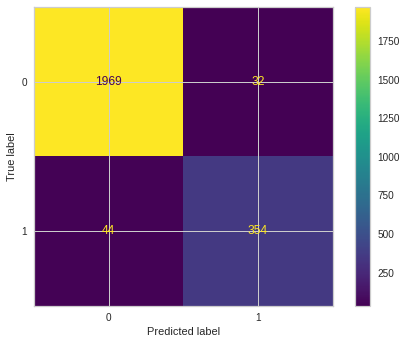

In [ ]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1969   32]
 [  44  354]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.92      0.89      0.90       398

    accuracy                           0.97      2399
   macro avg       0.95      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
test_error_rates = []
train_error_rates = []


for k in range(3,25,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

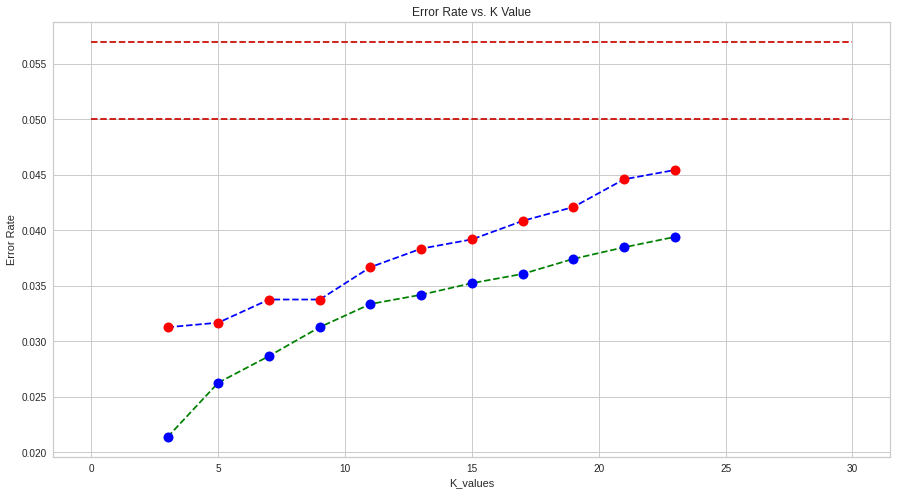

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(3,25,2), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(3,25,2), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.050, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[1958   43]
 [  51  347]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2001
           1       0.89      0.87      0.88       398

    accuracy                           0.96      2399
   macro avg       0.93      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set

[[7818  181]
 [ 157 1436]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.89      0.90      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.94      0.94      9592
weighted avg       0.96      0.96      0.96      9592



### #Random Forest Classifier

#### Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score,f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

#### Evaluating Model Performance and Tuning

In [ ]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1999    2]
 [  37  361]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.91      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



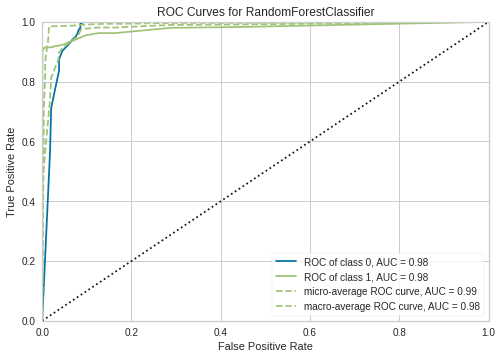

In [ ]:
from yellowbrick.classifier import ROCAUC

model = rf_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();     

#### Prediction

In [ ]:
pred_sample=df.drop(columns=['left']).sample(10)

In [ ]:
pred=rf_model.predict(pred_sample)
pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
df.iloc[pred_sample.index]['left'].values==pred
##All of our predictions are true, our model works perfectly 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### #XGBoost Classifier

#### Model Building

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

xgb.__version__

'0.90'

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier().fit(X_train, y_train)

#### Evaluating Model Performance and Tuning

In [ ]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[1991   10]
 [  38  360]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.97      0.90      0.94       398

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7945   54]
 [ 118 1475]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7999
           1       0.96      0.93      0.94      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



In [ ]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.980
test_precision   0.960
test_recall      0.918
test_f1          0.939
test_roc_auc     0.986
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=42)

In [ ]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
xgb_grid.best_score_

0.9511382644652612

In [ ]:
y_pred = xgb_grid.predict(X_test)
y_pred_proba = xgb_grid.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[1998    3]
 [  37  361]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.91      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7978   21]
 [ 110 1483]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.93      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.96      0.97      9592
weighted avg       0.99      0.99      0.99      9592



In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 50,
 'subsample': 0.8}

In [ ]:
model = XGBClassifier(colsample_bytree= 0.7,learning_rate=0.2,max_depth= 5,n_estimators=50,subsample=1)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)
xgb_imp_feats

,xgb_importance
satisfaction_level,0.343
time_spend_company,0.201
last_evaluation,0.149
number_project,0.142
average_montly_hours,0.097
Work_accident,0.041
salary,0.026
promotion_last_5years,0.000


In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

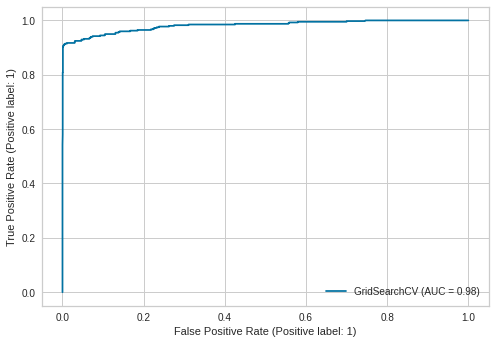

In [ ]:
plot_roc_curve(xgb_grid, X_test, y_test);

#### Prediction

In [ ]:
pred_sample=df.drop(columns=['left']).sample(10)

In [ ]:
pred=xgb_grid.predict(pred_sample)

In [ ]:
df.iloc[pred_sample.index]['left'].values==pred
##All of our predictions are true, our model works perfectly 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### #ANN Classifier

#### Layer Architecture Building and Compiling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10)
#In this part, we split X and y again in order to increase the training data

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((10791, 8), (1200, 8))

In [ ]:


model = Sequential()

model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(3, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/100
304/304 [==============================] - 1s 2ms/step - loss: 0.4947 - accuracy: 0.8326 - val_loss: 0.3914 - val_accuracy: 0.8444
Epoch 2/100
304/304 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8328 - val_loss: 0.3439 - val_accuracy: 0.8444
Epoch 3/100
304/304 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8328 - val_loss: 0.3065 - val_accuracy: 0.8444
Epoch 4/100
304/304 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8366 - val_loss: 0.2734 - val_accuracy: 0.8593
Epoch 5/100
304/304 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.2471 - val_accuracy: 0.9065
Epoch 6/100
304/304 [==============================] - 1s 2ms/step - loss: 0.2607 - accuracy: 0.8852 - val_loss: 0.2139 - val_accuracy: 0.9130
Epoch 7/100
304/304 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.9160 - val_loss: 0.1923 - val_accuracy: 0.9213

#### Evaluating Model Performance and Tunning

In [ ]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.495,0.833,0.391,0.844
1,0.384,0.833,0.344,0.844
2,0.341,0.833,0.306,0.844
3,0.309,0.837,0.273,0.859
4,0.285,0.866,0.247,0.906
5,0.261,0.885,0.214,0.913
6,0.236,0.916,0.192,0.921
7,0.219,0.932,0.181,0.946
8,0.208,0.940,0.169,0.947
9,0.199,0.943,0.159,0.946


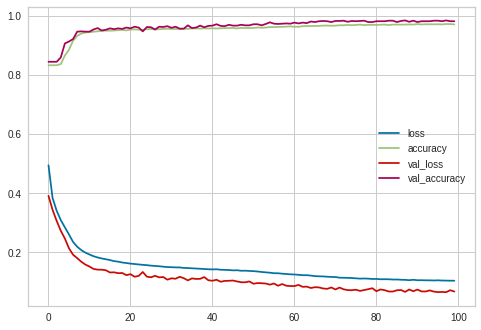

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.07640224695205688
accuracy :  0.9766666889190674


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

38/38 [==============================] - 0s 1ms/step
[[989  12]
 [ 16 183]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1001
           1       0.94      0.92      0.93       199

    accuracy                           0.98      1200
   macro avg       0.96      0.95      0.96      1200
weighted avg       0.98      0.98      0.98      1200



#### Prediction

In [ ]:
sample_pred=df.drop('left',axis=1).sample(10)

In [ ]:
index=sample_pred.index

In [ ]:
sample_pred=scaler.transform(sample_pred)

In [ ]:
(model.predict(sample_pred) > 0.5).astype("int32")

1/1 [==============================] - 0s 15ms/step


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
df.iloc[index]['left']
#if you compare this cell's result with that from before, we can see all our predictions are true

10539    0
11259    0
2766     0
3535     0
1017     1
2939     0
9190     0
4999     0
1773     1
1290     1
Name: left, dtype: int64